## Import code

In [1]:
from src.Data import * # Class containing the data
from src.Assignment import * # Class containing an assignment
from src.Model import * # Class containing a Pulp model used for optimization
from src.DataGen import * # Generate student preferences and school priorities
from src.DA_STB import * # Generate DA assignment with single tie-breaking (STB)

## Run code generated data
Specify the number of students and schools, and run the models for this data.

In [2]:
# Generate random data
parameters = DataGenParam(mean_pref = 6, capacity_ratio = 1) # Default parameters, except for mean_pref and capacity_ratio
MyData = generate_data(n_students=6, n_schools=6, parameters = parameters, name="Test_DataGen", print_data=False, seed = 15)

In [3]:
# Print data if desired
print(MyData)

The data instance has the following properties: 

	6 students.
	6 schools. 

 	PREFERENCES:
	0	2 5 3 4 1 0 
	1	3 4 1 5 2 0 
	2	1 3 4 2 5 0 
	3	1 3 4 2 5 0 
	4	3 1 2 5 4 0 
	5	4 3 1 2 5 0 


 	CAPACITIES & PRIORITIES:
	0	1	{2 3} {4 0} {1 5} 
	1	1	{1 0} {4 3} {5 2} 
	2	1	{1 5} {4 2} {0 3} 
	3	1	{5 3} {2 4} {1 0} 
	4	2	{2 5} {3 0} {4 1} 
	5	2	{0 5} {1 3} {2 4} 



In [4]:
# Generate the assignment from DA with Single Tie-Breaking with n_iter samples
n_iter = 1000
A = DA_STB(MyData, n_iter, 0, True)
print(A.assignment)

Students in ties: 6
Tie-breaking rules needed: 720
Tie-breaking rules sampled: 720


100%|██████████| 720/720 [00:00<00:00, 3332.24it/s]

[[0.         0.         0.         0.         0.         1.        ]
 [0.         0.66666667 0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.33333333 0.66666667 0.        ]
 [0.         0.33333333 0.         0.66666667 0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]]


In [5]:
# Solve the formulations
    # 'IMPR_RANK' refers to minimizing the expected rank while ensuring ex-post stability
    # 'STABLE' refers to maximizing the fraction of STABLE matchings in the decomposition
MyModel = Model(MyData, A, True)
q = MyModel.Solve("IMPR_RANK", "GUROBI", True)
#q = MyModel.Solve("STABLE", "GUROBI", True)


Average rank before optimization: 2.1666666666666665.


Set parameter Username
Set parameter LicenseID to value 2595965
Academic license - for non-commercial use only - expires 2025-12-05
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 5845 rows, 2737 columns and 22177 nonzeros
Model fingerprint: 0x04099b5d
Variable types: 1405 continuous, 1332 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 2e+00]
Presolve removed 5169 rows and 2435 columns
Presolve time: 0.05s
Presolved: 676 rows, 302 columns, 1825 nonzeros
Variable types: 265 continuous, 37 integer (37 binary)
Found heuristic solution: objective 1.8333333

Root relaxation: cutoff, 0

In [6]:
# Print the solution
MyModel.print_solution()

The obtained random matching is:
		0	1	2	3	4	5	
	0	0.0	0.0	0.0	0.0	0.0	1.0	
	1	0.0	0.0	0.0	0.0	1.0	0.0	
	2	0.0	0.0	0.0	1.0	0.0	0.0	
	3	0.0	1.0	0.0	0.0	0.0	0.0	
	4	0.0	0.0	1.0	-0.0	0.0	0.0	
	5	0.0	0.0	0.0	0.0	1.0	0.0	

The matchings with positive weights are:
	 w[0] = 1.0
		0	0	0	0	0	1	
		0	0	0	0	1	0	
		0	0	0	1	0	0	
		0	1	0	0	0	0	
		0	0	1	0	0	0	
		0	0	0	0	1	0	




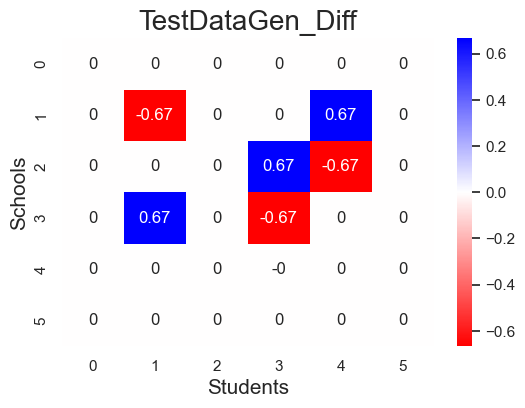

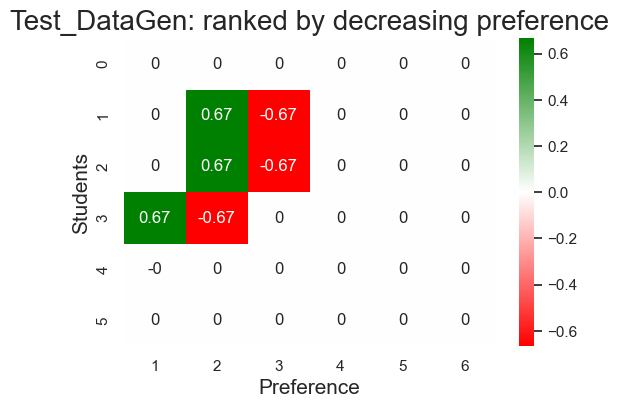

<Figure size 600x400 with 0 Axes>

In [7]:
# Asses and visualize the difference
diff = Assignment(MyData, q.assignment - A.assignment, "TestDataGen_Diff")
diff.visualize()

## Run code manual data
Manually enter data.

In [3]:
# Define preferences of the students
# 'pref[i][k]' contains the position of the k-th ranked school in the preferences.
# We assume the preferences to be strict
# Note that preferences can be strict. We indicate this by a tuple () in the list.

# Example paper
n_stud = 4
n_schools = 4

file_name = "Ex_paper"

# Preferences students
pref = [['1', '3', '4', '2'],
       ['1','4','3','2'],
       # ['1', '4'],
       ['2','3', '4', '1'],
       ['2', '4', '3', '1']]

# Priorities schools
prior = [[('A', 'B'), 'C', 'D'],
        [('C', 'D'), 'A', 'B'],
        ['B', 'D', ('A', 'C')],
        ['A', 'C', ('B', 'D')]]


# Capacities schools
cap = [1,1,1,1]

# Names of students and schools
ID_stud = ["A", "B", "C", "D"]
ID_school = ["1", "2", "3", "4"]

# Also create the random matching upon which we want to improve
p = np.zeros(shape=(n_stud, n_schools))
p[0][0] = 1/2
p[1][0] = 1/2
p[2][1] = 1/2
p[3][1] = 1/2
p[0][2] = 3/8
p[2][2] = 3/8
p[1][3] = 3/8
p[3][3] = 3/8
p[0][3] = 1/8
p[2][3] = 1/8
p[1][2] = 1/8
p[3][2] = 1/8

In [4]:
# Generate a data instance (and print it)
MyData = Data(n_stud, n_schools, pref, prior, cap, ID_stud, ID_school, file_name)
print(MyData)

The data instance has the following properties: 

	4 students.
	4 schools. 

 	PREFERENCES:
	A	1 3 4 2 
	B	1 4 3 2 
	C	2 3 4 1 
	D	2 4 3 1 


 	CAPACITIES & PRIORITIES:
	1	1	{A B} C D 
	2	1	{C D} A B 
	3	1	B D {A C} 
	4	1	A C {B D} 



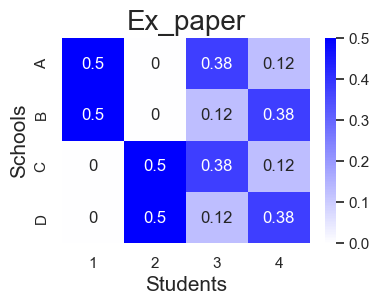

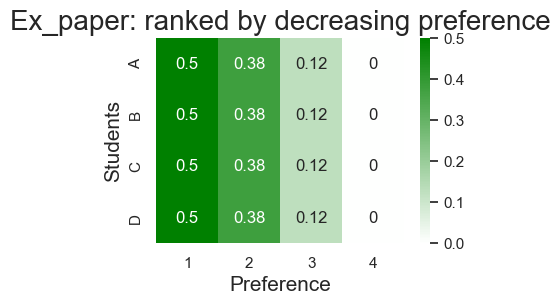

<Figure size 400x266.667 with 0 Axes>

In [5]:
# Generate an Assignment instance (and visualize it)
A = Assignment(MyData, p, "Ex_paper")

# To visualize assignment
A.visualize()

In [8]:
# Solve the formulations
    # 'IMPR_RANK' refers to minimizing the expected rank while ensuring ex-post stability
    # 'STABLE' refers to maximizing the fraction of STABLE matchings in the decomposition
MyModel = Model(MyData, A, False)
q = MyModel.Solve("IMPR_RANK", "GUROBI", False)
#q = MyModel.Solve("STABLE", "GUROBI", True)

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1257 rows, 577 columns and 3949 nonzeros
Model fingerprint: 0xfcfe4009
Variable types: 305 continuous, 272 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-01, 1e+00]
Presolve removed 607 rows and 242 columns
Presolve time: 0.00s
Presolved: 650 rows, 335 columns, 1919 nonzeros
Variable types: 233 continuous, 102 integer (102 binary)
Found heuristic solution: objective 1.5000000

Root relaxation: objective 1.000000e+00, 82 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   

In [9]:
# Print the solution
MyModel.print_solution()

The obtained random matching is:
		1	2	3	4	
	A	0.5	0.0	0.5	0.0	
	B	0.5	0.0	0.0	0.5	
	C	0.0	0.5	0.5	0.0	
	D	0.0	0.5	0.0	0.5	

The matchings with positive weights are:
	 w[0] = 0.5
		1	0	0	0	
		0	0	0	1	
		0	0	1	0	
		0	1	0	0	

	 w[9] = 0.5
		0	0	1	0	
		1	0	0	0	
		0	1	0	0	
		0	0	0	1	




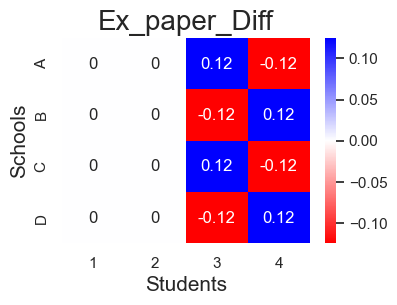

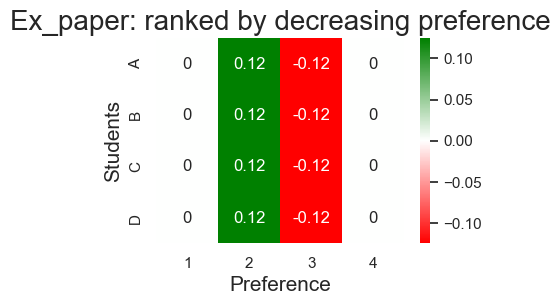

<Figure size 400x266.667 with 0 Axes>

In [11]:
# Asses and visualize the difference
diff = Assignment(MyData, q.assignment - p, "Ex_paper_Diff")
diff.visualize()